# PythonによるWebスクレイピング

以下では，サンプルページ

https://hirotakeyamazoe.jp/lecture/advexp/

に対して，スクレイピングを行う例を示す．

## 1. Requestsライブラリを用いたHTMLファイルの取得

### 以下で使用するライブラリの読み込み

In [1]:
# Requests, BeautifulSoupの読み込み
import requests
from bs4 import BeautifulSoup

# 画像表示用
import cv2
import matplotlib.pyplot as plt

### HTMLファイルの内容の取得
以下のコードを実行すると，サンプルのウェブページのhtmlの内容が取得，表示される．

In [2]:
# 読み込むURLの指定
url = 'https://hirotakeyamazoe.jp/lecture/advexp/'

# 指定のURLへアクセス
result = requests.get(url)

# 取得結果から文字コードを推定して設定
# この処理を入れないと、結果の出力で文字化けする）
result.encoding = result.apparent_encoding

# 取得結果の表示
print(result.text)

<html>
  <head>
    <meta charset="utf-8">
    <title>電子情報工学特別実験用サンプルページ</title>
    <link rel="stylesheet" href="main.css">
  </head>
  <body>
    <div id="title">
      <h1>電子情報工学特別実験用サンプルページ</h1>
      <h2>兵庫県立大学工学部</h2>
      <p>「ものづくり」に主眼を置いた教育・研究を通して、真に人類の利益と安全に貢献できる有能な人材の育成を図ります。
    </div>
    <div id="detail">
      <div class="denki">
        <h2>電気電子情報工学科</h2>
        <p class="desc">電気電子情報工学科では、技術革新をささえる電気・電子・情報分野の学問を学びます。</p>
        <div class="course">
          <h3><a href="./denki.html">電気工学コース</a></h3>
          <h3><a href="./denshi.html">電子情報工学コース</a></h3>
        </div>
      </div>
      <div class="kikai">
        <h2>機械・材料工学科</h2>
        <p class="desc">機械・材料工学科では、機械工学と材料工学に分かれて、それぞれの分野の高度な専門科目を修得していきます。</p>
        <div class="course">
          <h3><a href="./kikai.html">機械工学コース</a></h3>
          <h3><a href="./zairyo.html">材料工学コース</a></h3>
        </div>
      </div>
      <div class="kagaku">
        <h2>応用化学工学科</h2>
        <p class="desc">応用化学工学科では、応用化学コ

### アクセス状況の取得（今回の課題では考えなくてもOK）
アクセスの成功／失敗は，```result.ok```で取得できる．

アクセス状況（ステータスコード）は，```result.status_code```で取得できる．
*   成功の場合，200となる．
*   失敗の場合，200以外の値となる．404 (not found) が有名．



In [3]:
print(result.ok)
print(result.status_code)

True
200


### 画像ファイルの取得
サンプルのウェブページには画像が含まれている．

アドレスは，
https://hirotakeyamazoe.jp/lecture/advexp/img/gakubu.png
である．

以下のコードを実行すると，その画像が```image.png```というファイルとしてダウンロードされる．

In [4]:
# 読み込むURLの指定
url = 'https://hirotakeyamazoe.jp/lecture/advexp/img/gakubu.png'

# 指定のURLへアクセス
result = requests.get(url)

# ファイル(image.png)として保存
with open('image.png', 'wb') as fp:
  fp.write(result.content)

**保存したファイルの表示**

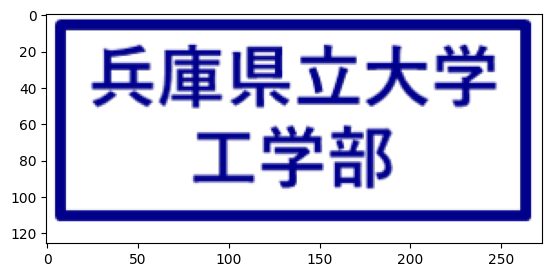

In [5]:
img = cv2.imread('image.png', cv2.IMREAD_UNCHANGED)  # カラー画像として読み込み
img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
plt.imshow(img, vmin = 0, vmax = 255)

## 2. Beautiful Soupを用いたスクレイピングの基礎

### スクレイピングの流れ
Step 1: HTMLの構造を理解し，取得する情報のタグ・属性を把握する

Step 2: Beautiful Soupを用いて，情報を取得する


### Step 1: HTMLの構造を理解し，取得する情報のタグ・属性を把握する

Chromeのデベロッパーツールなどを用いると，ウェブページとHTMLの関係を把握しやすい．それらを用いて，取得したい情報のタグと属性を把握する．

ここでは，「電子情報工学特別実験用サンプルページ」の部分を取得したいとすると，

```<h1>電子情報工学特別実験用サンプルページ</h1>```

となっており，```h1```要素を取得すればよいことがわかる．

### Step 2: Beautiful Soupを用いて，情報を取得する

Beautiful Soupは，スクレイピングのライブラリである．これを用いて，読み込んだHTMLを解析し，情報を取得できる．

#### HTML中に一つだけ存在する要素を取得する（```find()```関数）

まず，requestsで取得した結果をBeautifulSoupに入力し，```find()```関数を用いて```h1```要素を取得する．

以下のコードを実行すると，```h1```要素を取得し表示する．

In [6]:
# 読み込むURLの指定
url = 'https://hirotakeyamazoe.jp/lecture/advexp/'

# 指定のURLへアクセス
result = requests.get(url)

# 取得結果から文字コードを推定して設定
# この処理を入れないと、結果の出力で文字化けする）
result.encoding = result.apparent_encoding

# Beautiful Soupを用いて解析
soup = BeautifulSoup(result.text, 'html5lib')

# h1要素の取得
h1 = soup.find('h1')

# 取得結果の表示
print(h1.text)

電子情報工学特別実験用サンプルページ


```find()```関数を利用する代わりに，```soup.h1```といった形でも要素にアクセスできる．

In [7]:
# 別の方法でのh1要素の取得結果の表示
print(soup.h1.text)

電子情報工学特別実験用サンプルページ


#### 複数存在する要素全てを取得する（```find_all()```関数）
サンプルページ中に```h2```は複数存在する．```h2```全てを取得したい場合には，```find_all()```関数を利用する．

```find_all()```関数の戻り値はリストであり，```for```文を用いたり，添え字を付けてアクセスすると，各要素にアクセスできる．

In [8]:
# h2要素全てを取得
h2_list = soup.find_all('h2')

for h2 in h2_list:
  # 取得結果の表示
  print(h2.text)

# リストの1番目を表示
print("-----")
print(h2_list[1].text)

兵庫県立大学工学部
電気電子情報工学科
機械・材料工学科
応用化学工学科
-----
電気電子情報工学科


#### ```id```，```class```を用いて要素を指定・取得する（```select()関数```）

HTMLでは，タグに```id```や```class```といった属性を指定できる．これを用いて，取得情報をより細かく指定することができる．

例えば，```h2```のうち，学科名のみを取り出したい場合，学科の説明部分が
```<div id="detail"> </div>```で囲われていることを利用する．

こういった場合，```select()```関数を利用し，```soup.select('div#detail h2')```と指定するとよい．

引数の```div#detail h2```は，```<div id="detail"> </div>```の中の```<h2>```を意味する．






In [9]:
# id = "detail"のh2要素全てを取得
h2_list = soup.select('div#detail h2')

# 取得結果の表示
for h2 in h2_list:
  print(h2.text)

電気電子情報工学科
機械・材料工学科
応用化学工学科


```<div class="denki"> </div>```の中の```h3```を指定する場合は，```soup.select('div.denki h3')```と`.`で接続して指定する．

In [10]:
# class = "denki"のh3要素を全てを取得
h3_list = soup.select('div.denki h3')

# 取得結果の表示
for h3 in h3_list:
  print(h3.text)

電気工学コース
電子情報工学コース


#### ```select()```関数の指定方法の違い

上では，```select('div#detail h2')```と指定していたが，```select('div#detail > h2')```という指定方法もある．この違いについて考える．

まず，```select('div#detail div')```と指定したコードを実行すると，以下の結果が得られ，コースへのリンク部分が重複して取得されていることがわかる．

これは，```<div id="detail">```内には```<div class="denki/kikai/kagaku">```が含まれるが，その中にさらに```<div class="course">```が含まれ，これらのタグも重複して取得されているためである．

In [11]:
div_list = soup.select('div#detail div')

for div in div_list:
  print("-----")
  print(div)

-----
<div class="denki">
        <h2>電気電子情報工学科</h2>
        <p class="desc">電気電子情報工学科では、技術革新をささえる電気・電子・情報分野の学問を学びます。</p>
        <div class="course">
          <h3><a href="./denki.html">電気工学コース</a></h3>
          <h3><a href="./denshi.html">電子情報工学コース</a></h3>
        </div>
      </div>
-----
<div class="course">
          <h3><a href="./denki.html">電気工学コース</a></h3>
          <h3><a href="./denshi.html">電子情報工学コース</a></h3>
        </div>
-----
<div class="kikai">
        <h2>機械・材料工学科</h2>
        <p class="desc">機械・材料工学科では、機械工学と材料工学に分かれて、それぞれの分野の高度な専門科目を修得していきます。</p>
        <div class="course">
          <h3><a href="./kikai.html">機械工学コース</a></h3>
          <h3><a href="./zairyo.html">材料工学コース</a></h3>
        </div>
      </div>
-----
<div class="course">
          <h3><a href="./kikai.html">機械工学コース</a></h3>
          <h3><a href="./zairyo.html">材料工学コース</a></h3>
        </div>
-----
<div class="kagaku">
        <h2>応用化学工学科</h2>
        <p class="desc">応用化学工学科では、応用化学コースと化学工学コースに分かれて、基

次に，```select('div#detail > div')```と指定したコードを実行する．


この場合は，```<div class="course">```部分は重複して取得されず，```<div class="denki/kikai/kagaku">```のみが取得される．

つまり，```select('div#detail > div')```は，```<div id="detail">```直下の```<div>```タグのみを取得，という意味となる．

In [12]:
div_list = soup.select('div#detail > div')

for div in div_list:
  print("-----")
  print(div)

-----
<div class="denki">
        <h2>電気電子情報工学科</h2>
        <p class="desc">電気電子情報工学科では、技術革新をささえる電気・電子・情報分野の学問を学びます。</p>
        <div class="course">
          <h3><a href="./denki.html">電気工学コース</a></h3>
          <h3><a href="./denshi.html">電子情報工学コース</a></h3>
        </div>
      </div>
-----
<div class="kikai">
        <h2>機械・材料工学科</h2>
        <p class="desc">機械・材料工学科では、機械工学と材料工学に分かれて、それぞれの分野の高度な専門科目を修得していきます。</p>
        <div class="course">
          <h3><a href="./kikai.html">機械工学コース</a></h3>
          <h3><a href="./zairyo.html">材料工学コース</a></h3>
        </div>
      </div>
-----
<div class="kagaku">
        <h2>応用化学工学科</h2>
        <p class="desc">応用化学工学科では、応用化学コースと化学工学コースに分かれて、基礎から徐々に専門性を高めて学習します。</p>
        <div class="course">
          <h3><a href="./ouyou.html">応用化学コース</a></h3>
          <h3><a href="./kagaku.html">化学工学コース</a></h3>
        </div>
      </div>


#### 取得結果をCSVファイルに保存

以上を踏まえて，学科名と説明文を取得し，CSVファイルに保存する．

```<div id="detail"> </div>```内に```<div class="denki/kikai/kagaku">```が並んでおり，その中に学科名(```h2```）と説明文（```p```）が書かれている．
これらを取得し，リストに代入後，CSVファイルに保存する．

In [13]:
div_list = soup.select('div#detail > div')

res_list = []
for div in div_list:
  name = div.h2.text
  desc = div.p.text
  print(name, desc)
  res_list.append([name, desc])

import csv
with open('gakka.csv', 'wt', encoding='sjis', newline='') as fp:
  csv.writer(fp).writerows(res_list)

電気電子情報工学科 電気電子情報工学科では、技術革新をささえる電気・電子・情報分野の学問を学びます。
機械・材料工学科 機械・材料工学科では、機械工学と材料工学に分かれて、それぞれの分野の高度な専門科目を修得していきます。
応用化学工学科 応用化学工学科では、応用化学コースと化学工学コースに分かれて、基礎から徐々に専門性を高めて学習します。


## 3. 別ページでの例

別ページでの例として，

https://hirotakeyamazoe.jp/publication-ja.html

に対して，スクレイピングを行う例を示す．

### Step 1: HTMLの構造を理解し，取得する情報のタグ・属性を把握する

Chromeのデベロッパーツールなどを用いると，ウェブページとHTMLの関係を把握しやすい．それらを用いて，取得したい情報のタグと属性を把握する．

ここでは，「論文誌」内の文献リストを取得したいとすると，

```<div id="journal">```内の```<li>```要素を取得すれば良いことがわかる．

### Step 2: Beautiful Soupを用いて，情報を取得する

Beautiful Soupは，スクレイピングのライブラリである．これを用いて，読み込んだHTMLを解析し，情報を取得できる．

In [14]:
# 読み込むURLの指定
url = 'https://hirotakeyamazoe.jp/publication-ja.html'

# 指定のURLへアクセス
result = requests.get(url)

# 取得結果から文字コードを推定して設定
# この処理を入れないと、結果の出力で文字化けする）
result.encoding = result.apparent_encoding

# Beautiful Soupを用いて解析
soup = BeautifulSoup(result.text, 'html5lib')

# id = "journal"のh2要素全てを取得
li_list = soup.select('div#journal li')

# 先頭から３件を表示
for i in range(3):
  print("{}件目".format(i))
  # 途中に改行が含まれるため，改行を取り除く
  print(li_list[i].text.replace('\n',''))

0件目
事前定義計算モジュールの組込みによる隠れパラメータの誘導と深層学習の性能向上    施真琴,     内海章,     山添大丈,    李周浩,         電子情報通信学会論文誌D,    Vol.J106-D, No.4, pp.268-276,    2023    [link]    
1件目
Analysis of impressions of robot by changing its motion and trajectory parameters for designing parameterized behaviors of home-service robots    Hirotake Yamazoe,    Jaemin Chun,     Youngsun Kim,     Kenta Miki,     Takuya Imazaike,     Yume Matsushita and Joo-Ho Lee ,         Intelligent Service Robotics,    Vol. 16, pp.3-18,    2023    [link]    
2件目
Personalized Face-Pose Estimation Network Using Incrementally Updated Face Shape Parameters    Makoto Sei,     Akira Utsumi,     Hirotake Yamazoe,    Joo-Ho Lee,         Applied Intelligence,    Vol. 52, pp.11506-11516,    2022    [link]    


#参考文献
*   クジラ飛行机 (著)，シゴトがはかどる Python自動処理の教科書，2020
*   齊藤 貴義 (著)，スクレイピング・ハッキング・ラボ　Pythonで自動化する未来型生活，2020

